<a href="https://colab.research.google.com/github/Mayank-Patel-9/Machine-Learning/blob/main/Evaluation_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             mean_absolute_error, mean_squared_error, r2_score)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Load dataset
df = pd.read_csv("churn_dataset.csv")

# Preprocessing
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Model (Random Forest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

Classification Metrics:
Accuracy: 0.9250
Precision: 0.8493
Recall: 0.6139
F1-score: 0.7126
ROC-AUC: 0.9218
Confusion Matrix:
[[555  11]
 [ 39  62]]


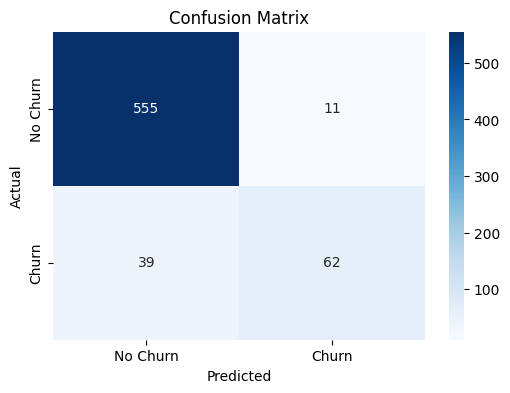

In [21]:
# Classification Metrics
print("Classification Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualization: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

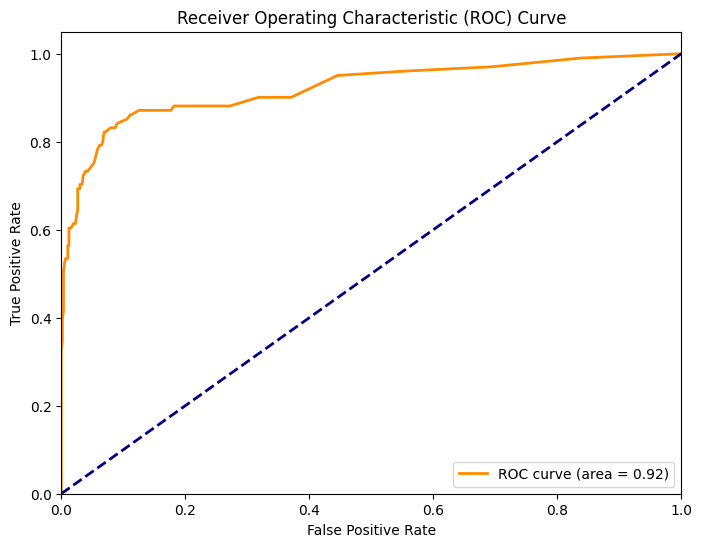

In [22]:
# ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Regression Model (Predicting churn probability)
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
y_reg_pred = reg.predict(X_test)

# Regression Metrics
mae = mean_absolute_error(y_test, y_reg_pred)
mse = mean_squared_error(y_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_reg_pred)

print("\nRegression Metrics:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


Regression Metrics:
MAE: 0.1175
MSE: 0.0578
RMSE: 0.2404
R-squared: 0.5504
